# **Epipolar Geometry in Stereo Vision**

## **Overview**

Epipolar geometry is a fundamental concept in stereo vision, a technique that allows two cameras to capture 3D information from a scene. This exercise demonstrates how to detect key points from two images taken by stereo cameras and draw epipolar lines based on these points.

### **Purpose**
The goal of this exercise is to visualize how two cameras, placed at different positions, perceive the same scene. By matching points between the two images, we can compute the fundamental matrix that defines the geometric relationship between the two camera views and draw epipolar lines.

### **Theory**

1. **Epipolar Geometry**: 
   - In a stereo vision setup, a 3D point in the scene is projected onto both image planes. Given a point in one image, the corresponding point in the other image must lie on a specific line, called the *epipolar line*. The set of all epipolar lines forms the *epipolar plane*, which defines the geometric relationship between the two camera views.

2. **Stereo Vision**: 
   - Stereo vision involves using two cameras to capture images of the same scene from slightly different perspectives. The disparity between the two views helps recover depth information, which is lost when using a single camera.

3. **Fundamental Matrix (F)**: 
   - The fundamental matrix encapsulates the epipolar geometry between two views. It maps points in one image to corresponding epipolar lines in the other image. It is computed based on corresponding points between the two views using keypoints and matches.

4. **Keypoint Detection and Matching**: 
   - Keypoint detectors such as SIFT (Scale-Invariant Feature Transform) are used to extract distinctive features from both images. These features are then matched between the two images to identify corresponding points.

### **Steps**

1. **Keypoint Detection**:
   - Using SIFT, keypoints are detected in both the left and right images. SIFT is a popular feature detection algorithm that is scale and rotation invariant, making it well-suited for finding robust keypoints.

2. **Keypoint Matching**:
   - After detecting keypoints, the `cv2.BFMatcher` is used to match the descriptors between the two images. The matched keypoints represent the same physical point viewed from two different perspectives.

3. **Fundamental Matrix Computation**:
   - Using the matched keypoints, the fundamental matrix `F` is computed using the `cv2.findFundamentalMat()` function. The fundamental matrix encodes the epipolar geometry between the two images.

4. **Epipolar Line Computation**:
   - Once the fundamental matrix is available, epipolar lines are computed using `cv2.computeCorrespondEpilines()`. This function generates lines in one image corresponding to points in the other image. These epipolar lines are then drawn to visualize the geometric relationship between the two cameras.

5. **Visualization**:
   - The epipolar lines are drawn on the images, showing how points in one image correspond to lines in the other. By changing the number of matched keypoints, you can observe how the quality and precision of the epipolar lines change.

### **Functions and Parameters**

1. **`cv2.SIFT_create()`**:
   - **Purpose**: Detects and computes keypoints and descriptors using the SIFT algorithm.
   - **Returns**:
     - `kp`: Keypoints.
     - `des`: Descriptors corresponding to the keypoints.

2. **`cv2.BFMatcher()`**:
   - **Purpose**: Matches the descriptors between two images.
   - **Parameters**:
     - `cv2.NORM_L2`: Norm type used to compare descriptors.
     - `crossCheck=True`: Ensures that the matches are consistent in both directions.
   - **Returns**: List of matches sorted by distance (best matches first).

3. **`cv2.findFundamentalMat()`**:
   - **Purpose**: Computes the fundamental matrix between the two camera views.
   - **Parameters**:
     - `pts1, pts2`: Matched points between the two images.
     - `cv2.FM_RANSAC`: Robust method for estimating the fundamental matrix, excluding outliers.
   - **Returns**:
     - `F`: The fundamental matrix.
     - `mask`: Indicates which points are inliers (i.e., valid matches).

4. **`cv2.computeCorrespondEpilines()`**:
   - **Purpose**: Computes the epipolar lines corresponding to the points in the other image.
   - **Parameters**:
     - `pts`: Points in one image for which epipolar lines will be drawn in the other image.
     - `F`: The fundamental matrix.
   - **Returns**: Epipolar lines.

5. **`drawlines()`**:
   - **Purpose**: Draws the epipolar lines on the images.
   - **Parameters**:
     - `img1, img2`: The images on which the lines will be drawn.
     - `lines`: Epipolar lines.
     - `pts1, pts2`: Points in each image corresponding to the lines in the other image.
   - **Returns**: Images with epipolar lines and corresponding points drawn.

### **Conclusion**
This exercise demonstrates how epipolar geometry can be visualized using stereo images. By detecting keypoints, matching them between two images, and computing the fundamental matrix, we can draw epipolar lines that illustrate how 3D points are projected onto 2D image planes in a stereo camera setup. This forms the basis for tasks such as 3D reconstruction and depth estimation in computer vision.


In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Exercise 2.1
Use [SIFT](https://docs.opencv.org/4.7.0/d7/d60/classcv_1_1SIFT.html) to detect and compute features in both the left and right images and optionally visualize the keypoints.

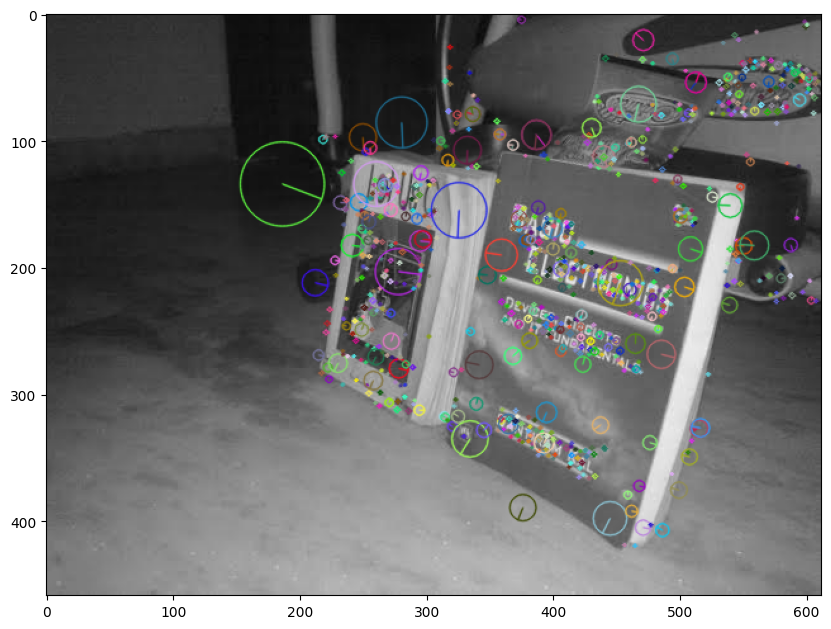

In [8]:
img1 = cv2.imread("img_left.jpg", 0)
img2 = cv2.imread("img_right.jpg", 0)


# Detect keypoints with SIFT
kp1, des1 = cv2.xfeatures2d.SIFT_create().detectAndCompute(img1, None)
kp2, des2 = cv2.xfeatures2d.SIFT_create().detectAndCompute(img2, None)


kp_img = cv2.drawKeypoints(img2, kp2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (10,10))
plt.imshow(kp_img)

## Exercise 2.2
The next step is to match the features in the two images. We can do that exactly like we did in previous exercises using [`cv2.BFMatcher`](https://docs.opencv.org/4.7.0/d3/da1/classcv_1_1BFMatcher.html). 

Fill in the missing code below by implementing `cv2.BFMatcher`. Store the matching results in a variable called `matches`.

In [9]:
# Create a BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors between the two images
matches = bf.match(des1, des2)

# Sort them in the order of their distance (i.e. best matches first).
matches = sorted(matches, key = lambda x:x.distance)

The above gives us a list of best matches in proritized order. We can use the function [`findFundamentalMat`](https://docs.opencv.org/4.x/d9/d0c/group__calib3d.html#gae420abc34eaa03d0c6a67359609d8429) to compute the fundamental matrix using a number of the best keypoint matches.

In [10]:
nb_matches = 200

good = []
pts1 = []
pts2 = []

for m in matches[:nb_matches]:
    good.append(m)
    pts1.append(kp1[m.queryIdx].pt)
    pts2.append(kp2[m.trainIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
    
# Implement findFundamentalMat here:
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)


# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

In order to draw the epipolar lines, we can use the following function.

In [11]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,2)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

## Exercise 2.3
We can then use the function [`computeCorrespondEpilines`](https://docs.opencv.org/4.x/d9/d0c/group__calib3d.html#ga19e3401c94c44b47c229be6e51d158b7), which uses the fundamental matrix and the matching keypoints.

Previously, we selected a number of the best keypoint matches. Try to decrease or increase this number and visuallise the result. What happens with the epipolar lines? Remember you have to compute the fundamental matrix again based on the new number of keypoints.

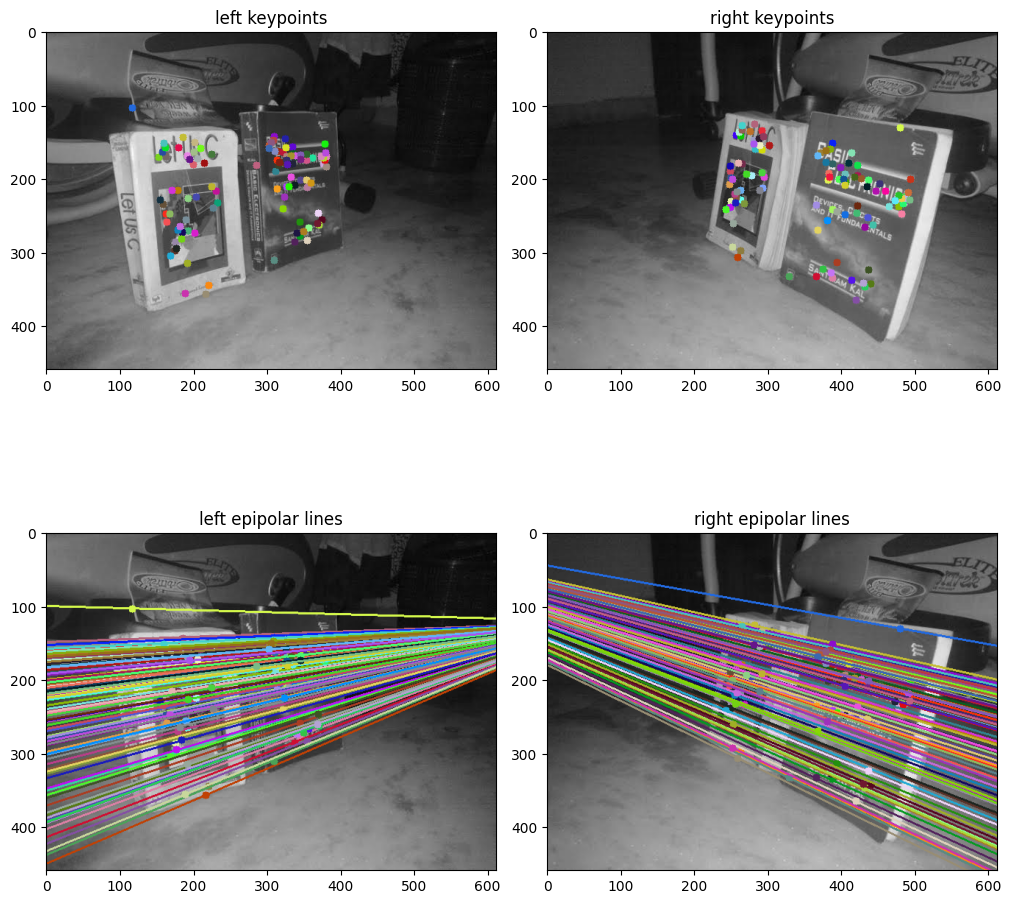

In [12]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2 ,F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2, img1, lines2, pts2, pts1)

fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(10,10))
axs[0, 0].imshow(img4)
axs[0, 0].set_title('left keypoints')
axs[0, 1].imshow(img6)
axs[0, 1].set_title('right keypoints')
axs[1, 0].imshow(img5)
axs[1, 0].set_title('left epipolar lines')
axs[1, 1].imshow(img3)
axs[1, 1].set_title('right epipolar lines')
plt.show()

## Optional exercise
The downside of using bf matcher is that it doesn't scale well when the number of keypoints increase. Instead we could opt for using `Fast Library for Approximate Nearest Neighbors (flann)` by sacrificing some accuracy. The exercise is to replace bf match in the previous exercise with a [flann based matcher](https://docs.opencv.org/4.7.0/dc/de2/classcv_1_1FlannBasedMatcher.html) and compare the results.